In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rc
import pickle
import numpy as np
from math import pi
import os

rc("font", **{"family": "serif", "serif": ["Times"]})
rc('text', usetex=True)

SINGLE_WIDTH = 246 / 72
DOUBLE_WIDTH = 510 / 72
GOLDEN_RATIO = (5**0.5 - 1) / 2
DATA_DIR = "../data"
SAVE_FIG = True
SAVE_DIR = "../figs"

# Benchmark optimizers

In [2]:
# problem = "po"
# p = 1
# n = 12
# seed_pool = list(range(60 if problem == "po" else 100))
# reps = 5
# fig_size = (SINGLE_WIDTH, SINGLE_WIDTH * GOLDEN_RATIO)

# data = pickle.load(
#     open(
#         f"{DATA_DIR}/{problem}/optimizer/p{p}-s{seed_pool[0]}-{seed_pool[-1]}-r={reps}.pckl",
#         "rb",
#     ),
# )
# config = data["config"]
# methods = np.concatenate([c["optimizer"] for c in config])
# result = data["result"]
# data = pickle.load(
#     open(
#         f"{DATA_DIR}/{problem}/configs/max_ar/LN_COBYLA (NLopt)-p{p}-q{n}-s0-{59 if problem == 'po' else 999}.pckl",
#         "rb",
#     ),
# )
# max_ar = data["result"][: len(seed_pool)][None, :, None]
# initial_ar = np.array(data["initial_ar"])[: len(seed_pool)][None, :, None]
# result = ((result - initial_ar) / (max_ar - initial_ar)).reshape(len(methods), -1)[:-1] # ESCH was run twice
# methods = methods[:-1] # ESCH was run twice
# order = np.argsort(np.mean(result, axis=1))[:1:-1] # SPSA is too low
# result = result[order]
# methods = methods[order]

# print(result.shape, methods)
# plt.figure(figsize=fig_size, layout="constrained")
# plt.errorbar(
#     range(1, len(methods) + 1),
#     np.mean(result, axis=1),
#     yerr=np.std(result, axis=1) / np.sqrt(result.shape[1]),
#     linestyle="None",
#     marker="o",
#     markersize=4,
# )
# plt.ylabel("Relative AR improvement")
# plt.xticks(
#     range(1, len(methods) + 1),
#     [m.split("_", 1)[-1] for m in methods],
#     rotation=30,
#     ha="right",
# )
# plt.ylim(0.8, 0.9)
# if SAVE_FIG:
#     savepath = f"{SAVE_DIR}/{problem}/optimizer/p{p}-s{seed_pool[0]}-{seed_pool[-1]}-r={reps}.pdf"
#     os.makedirs(os.path.dirname(savepath), exist_ok=True)
#     plt.savefig(savepath)

# Initial step size (rhobeg)

In [3]:
# method = "Py-BOBYQA (Custom)"
# problem = "maxcut"
# n = 12
# depth_pool = list(range(1, 6))
# seed_pool = list(range(60 if problem == "po" else 100))
# fig_size = (SINGLE_WIDTH, SINGLE_WIDTH * GOLDEN_RATIO)

# for p in depth_pool:
#     data = pickle.load(
#         open(
#             f"{DATA_DIR}/{problem}/configs/max_ar/{method}-p{p}-q{n}-s0-{59 if problem == 'po' else 999}.pckl",
#             "rb",
#         ),
#     )
#     max_ar = data["result"][:len(seed_pool),None,None]


#     data = pickle.load(
#         open(
#             f"{DATA_DIR}/{problem}/configs/rhobeg/{method}-p{p}-q{n}-s{seed_pool[0]}-{seed_pool[-1]}.pckl",
#             "rb",
#         ),
#     )
#     config = data["config"]
#     maxfev_pool = config["maxeval"][:12]
#     rhobeg_pool = config["initial_step"]
#     result = data["result"]
#     initial_ar = np.array(data["initial_ar"])[:,None,None]

#     result = (result - initial_ar) / (max_ar - initial_ar)
#     print(config)

#     colors = mpl.colormaps["cool"](np.linspace(0, 1, len(maxfev_pool)))
#     plt.figure(figsize=fig_size, layout="constrained")
#     for j, (maxfev, color) in enumerate(zip(maxfev_pool, colors)):
#         ys = result[:, j]
#         y = np.mean(ys, axis=0)
#         std_err = np.std(ys, axis=0) / np.sqrt(len(seed_pool))
#         plt.errorbar(
#             rhobeg_pool,
#             y,
#             yerr=std_err,
#             label=f"{maxfev - 2 * p - 1}",
#             color=color,
#             linewidth=1,
#         )
#         plt.fill_between(rhobeg_pool, y - std_err, y + std_err, alpha=0.2, color=color)

#     # plt.ylim((0, 1.05))
#     if problem == "maxcut":
#         plt.xlim((0, 0.2))
#     elif problem == "po":
#         plt.xlim((0, 1))
#     plt.ylabel("Relative AR improvement")
#     plt.xlabel("Initial step size")
#     plt.legend(
#         title="Additional evaluations",
#         ncol=6,
#         columnspacing=0.2,
#         handletextpad=0.1,
#         handlelength=1,
#         borderpad=0.2,
#         markerscale=0.1,
#     )
#     # plt.tight_layout()
#     if SAVE_FIG:
#         savepath = f"{SAVE_DIR}/{problem}/rhobeg/{method}-p{p}-q{n}.pdf"
#         os.makedirs(os.path.dirname(savepath), exist_ok=True)
#         plt.savefig(savepath)

# Budget allocation

In [38]:
import pybobyqa
def pybobyqa_solve(*args, **kwargs):
    res = pybobyqa.solve(*args, **kwargs)
    return {
        "optimal_params": res.x,
        "optimal_value": res.f,
        "num_iters": res.nf,
        "num_fun_evals": res.nf,
    }

{'initial_point': [array([1.23106726, 1.57068812])], 'maxfun': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 35, 40, 45, 50], 'rhobeg': [0.1], 'executor_kwargs': [{'shots': 2000}, {'shots': 1666}, {'shots': 1428}, {'shots': 1250}, {'shots': 1111}, {'shots': 1000}, {'shots': 909}, {'shots': 833}, {'shots': 769}, {'shots': 714}, {'shots': 666}, {'shots': 625}, {'shots': 588}, {'shots': 555}, {'shots': 526}, {'shots': 500}, {'shots': 476}, {'shots': 454}, {'shots': 434}, {'shots': 416}, {'shots': 400}, {'shots': 384}, {'shots': 370}, {'shots': 357}, {'shots': 344}, {'shots': 333}, {'shots': 285}, {'shots': 250}, {'shots': 222}, {'shots': 200}]}
{'initial_point': [array([0.97541947, 1.79597539, 2.22024136, 1.17003126])], 'maxfun': [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 35, 40, 45, 50], 'rhobeg': [0.1], 'executor_kwargs': [{'shots': 1111}, {'shots': 1000}, {'shots': 909}, {'shots': 833}, {

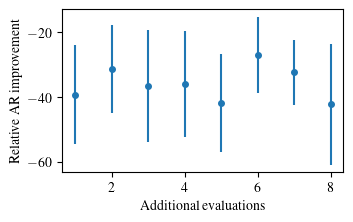

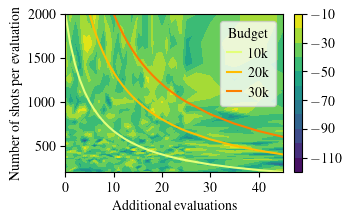

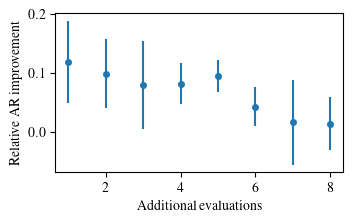

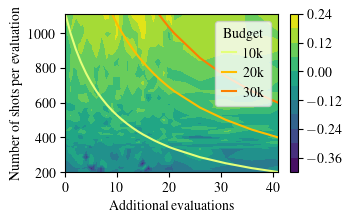

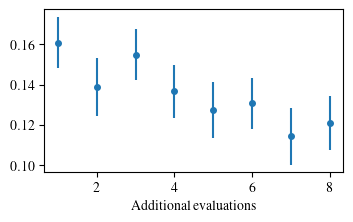

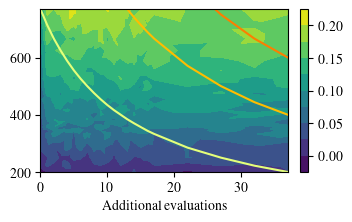

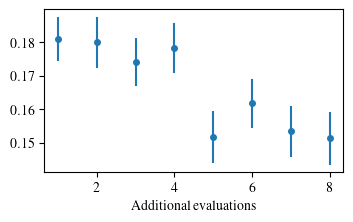

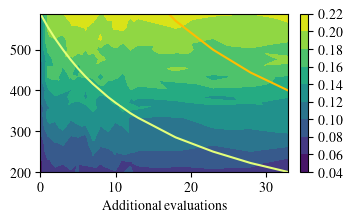

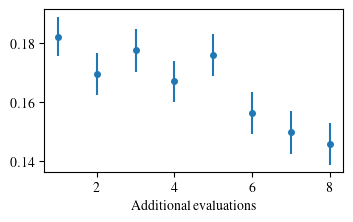

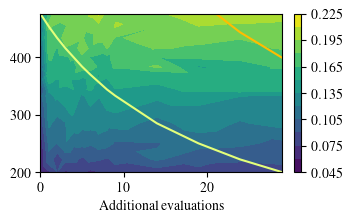

In [45]:
method = "Py-BOBYQA (Custom)"
store_method="PyBOBYQA"
problem = "maxcut"
n = 12
depth_pool = list(range(1, 6))
seed_pool = list(range(60 if problem == "po" else 1000))
fig_size = (SINGLE_WIDTH, SINGLE_WIDTH * GOLDEN_RATIO)


for p in depth_pool:
    data = pickle.load(
        open(
            f"{DATA_DIR}/{problem}/configs/max_ar/{method}-p{p}-q{n}-s0-{59 if problem == 'po' else 999}.pckl",
            "rb",
        ),
    )
    max_ar = data["result"][: len(seed_pool), None, None]

    data = pickle.load(
        open(
            f"{DATA_DIR}/{problem}/configs/budget/{method}-p{p}-q{n}-s{seed_pool[0]}-{seed_pool[-1]}.pckl",
            "rb",
        ),
    )
    config = data["config"]
    result = data["result"][:, :, :]
    initial_ar = np.array(data["initial_ar"])[:, None, None]

    print(config)
    shots_pool = [d["shots"] for d in config["executor_kwargs"]][:]
    maxfev_pool = config["maxfun"][:]
    maxfev_pool = np.array(maxfev_pool) - 4 * p - 1
    result = (result - initial_ar) / (max_ar - initial_ar)

    plt.figure(figsize=fig_size, layout="constrained")
    plt.errorbar(
        maxfev_pool[1:9],
        [np.mean(result, axis=0)[i, i] for i in range(len(shots_pool))][1:9],
        yerr=[
            np.std(result[:, i, i]) / np.sqrt(result.shape[0])
            for i in range(len(shots_pool))
        ][1:9],
        fmt="o",
        # capsize=2,
        markersize=4,
    )
    if p <= 2:
        plt.ylabel("Relative AR improvement")
    plt.xlabel("Additional evaluations")
    if SAVE_FIG:
        savepath = f"{SAVE_DIR}/{problem}/budget/{store_method}-p{p}-q{n}-slice.pdf"
        os.makedirs(os.path.dirname(savepath), exist_ok=True)
        plt.savefig(savepath)

    budget = 10000

    plt.figure(figsize=fig_size, layout="constrained")
    x, y = np.meshgrid(maxfev_pool, shots_pool, indexing="ij")
    z = np.mean(result, axis=0)
    fig = plt.tricontourf(x.flat, y.flat, z.flat, levels=10)
    colors = mpl.colormaps["Wistia"](np.linspace(0, 1, 3))
    for i in range(1, 4):
        plt.plot(
            maxfev_pool,
            budget * i // (maxfev_pool + 4 * p + 1),
            label=f"{i}0k",
            color=colors[i - 1],
        )
    plt.colorbar(fig)
    plt.ylim((shots_pool[-1], shots_pool[0]))
    plt.xlabel("Additional evaluations")
    if p <= 2:
        plt.ylabel("Number of shots per evaluation")
        plt.legend(
            title="Budget",
            handletextpad=0.5,
            handlelength=1,
            borderpad=0.5,
            loc="upper right",
        )
    if SAVE_FIG:
        savepath = f"{SAVE_DIR}/{problem}/budget/{store_method}-p{p}-q{n}.pdf"
        os.makedirs(os.path.dirname(savepath), exist_ok=True)
        plt.savefig(savepath)

# Landscapes

In [5]:
# from functools import partial
# from oscar import plot_2d_landscape, CustomExecutor, Landscape

# problem = "maxcut"
# p = 1
# n = 12
# seed = 0
# resolutions = [256, 128]
# gamma_shift = pi / 2
# beta_shift = -pi / 4
# rng = np.random.default_rng(seed)


# def shotted_measurement(params, landscape, landscape_std, sense, shots=None):
#     energy = landscape.interpolator(np.asarray(params)).item()
#     if shots is None:
#         return sense * energy
#     energy_std = landscape_std.interpolator(np.asarray(params)).item() / np.sqrt(shots)
#     return sense * rng.normal(energy, energy_std)


# landscapes = []
# filename = f"{DATA_DIR}/{problem}/landscapes/{p=}/{n=}/{problem}-{p=}-{n=}-{seed=}-({2*gamma_shift:.2f}, {2*beta_shift:.2f})-{resolutions}"
# for objective in ["expectation", "std"]:
#     landscapes.append(
#         np.load(filename + f"-{objective}.pckl", allow_pickle=True)[64:192]
#     )
#     figure = plot_2d_landscape(
#         landscapes[-1],
#         figure=plt.figure(
#             figsize=(DOUBLE_WIDTH / 3, DOUBLE_WIDTH / 3 * GOLDEN_RATIO),
#             layout="constrained",
#         ),
#     )
#     plt.figure(figure)
#     plt.xticks([], [])
#     plt.yticks([], [])
#     plt.legend().remove()
#     if SAVE_FIG:
#         savepath = filename.replace(DATA_DIR, SAVE_DIR) + f"-{objective}.pdf"
#         os.makedirs(os.path.dirname(savepath), exist_ok=True)
#         plt.savefig(savepath)

# for shots in [500, 5000]:
#     eval_func = partial(
#         shotted_measurement,
#         landscape=landscapes[0],
#         landscape_std=landscapes[-1],
#         sense=1,
#         shots=shots,
#     )
#     from oscar import NLoptOptimizer, QiskitOptimizer

#     landscape = Landscape.like(landscapes[0])
#     landscape.run_all(CustomExecutor(eval_func))
#     trace, original_result = NLoptOptimizer(
#         "LN_COBYLA", xtol_abs=1e-11, maxeval=20
#     ).run(
#         CustomExecutor(eval_func),
#         initial_point=[1.0, 2.0],
#         bounds=[landscape.param_bounds[0], landscape.param_bounds[1][::-1]],
#     )
#     trace.print_result()
#     figure = plot_2d_landscape(
#         landscape,
#         trace=trace,
#         figure=plt.figure(
#             figsize=(DOUBLE_WIDTH / 3, DOUBLE_WIDTH / 3 * GOLDEN_RATIO),
#             layout="constrained",
#         ),
#     )
#     plt.figure(figure)
#     plt.xticks([], [])
#     plt.yticks([], [])
#     plt.legend(
#         loc="upper center", labelspacing=0.1, borderpad=0.1, bbox_to_anchor=(0.5, 1.05)
#     ).remove()
#     if SAVE_FIG:
#         savepath = filename.replace(DATA_DIR, SAVE_DIR) + f"-{shots=}.pdf"
#         os.makedirs(os.path.dirname(savepath), exist_ok=True)
#         plt.savefig(savepath)